In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
from statistics import mean
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634


In [4]:
confirmed_df.tail(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [5]:
cols = confirmed_df.keys()

In [6]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [7]:
confirmed.head()
#deaths.head()
#recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,0,0,0,0,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,0,0,0,0,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25


In [8]:

## confirmed_df

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
india_cases = [] 
Germany_cases  = [] 
France_cases  = [] 
UK_cases  = []
Switzerland_cases  = []
Netherlands_cases  = []
Belgium_cases  = []
SKorea_cases  = []
Turkey_cases  = []
Austria_cases  = []
Canada_cases  = []
Australia_cases  = []
Norway_cases  = []
Brazil_cases  = []
Iran_cases =[]
Israel_cases =[]
Australia_cases =[]


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    Germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    France_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    UK_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    Switzerland_cases.append(confirmed_df[confirmed_df['Country/Region']=='Switzerland'][i].sum())
    Netherlands_cases.append(confirmed_df[confirmed_df['Country/Region']=='Netherlands'][i].sum())
    Belgium_cases.append(confirmed_df[confirmed_df['Country/Region']=='Belgium'][i].sum())
    SKorea_cases.append(confirmed_df[confirmed_df['Country/Region']=='Korea, South'][i].sum())
    Turkey_cases.append(confirmed_df[confirmed_df['Country/Region']=='Turkey'][i].sum())
    Austria_cases.append(confirmed_df[confirmed_df['Country/Region']=='Austria'][i].sum())
    Canada_cases.append(confirmed_df[confirmed_df['Country/Region']=='Canada'][i].sum())
    Norway_cases.append(confirmed_df[confirmed_df['Country/Region']=='Norway'][i].sum())
    Brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    Iran_cases.append(confirmed_df[confirmed_df['Country/Region']=='Iran'][i].sum())
    Israel_cases.append(confirmed_df[confirmed_df['Country/Region']=='Israel'][i].sum())
    Australia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Australia'][i].sum())
    

In [9]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
india_daily_increase = daily_increase(india_cases)

In [10]:
confirmed_df[confirmed_df['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370


In [11]:
## recoveries_df

dates = confirmed.keys()
world_recoveries = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
india_recoveries = [] 
Germany_recoveries  = [] 
France_recoveries  = [] 
UK_recoveries  = []
Switzerland_recoveries  = []
Netherlands_recoveries  = []
Belgium_recoveries  = []
SKorea_recoveries  = []
Turkey_recoveries  = []
Austria_recoveries  = []
Canada_recoveries  = []
Australia_recoveries  = []
Norway_recoveries  = []
Brazil_recoveries  = []
Iran_recoveries =[]
Israel_recoveries =[]
Australia_recoveries =[]


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_recoveries.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    
    Germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    France_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    UK_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    Switzerland_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Switzerland'][i].sum())
    Netherlands_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Netherlands'][i].sum())
    Belgium_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Belgium'][i].sum())
    SKorea_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Korea, South'][i].sum())
    Turkey_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Turkey'][i].sum())
    Austria_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Austria'][i].sum())
    Canada_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Canada'][i].sum())
    Norway_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Norway'][i].sum())
    Brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    Iran_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Iran'][i].sum())
    Israel_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Israel'][i].sum())
    Australia_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Australia'][i].sum())
    

In [12]:
#recoveries_df[recoveries_df['Country/Region']=='India']['3/22/20']
l=list(deaths_df[deaths_df['Country/Region']=='India']['4/22/20'])
l[0]

681

In [13]:
def daily_recoveries(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_recoveries = daily_recoveries(world_recoveries)
china_daily_recoveries = daily_recoveries(china_recoveries)
italy_daily_recoveries = daily_recoveries(italy_recoveries)
us_daily_recoveries = daily_recoveries(us_recoveries)
spain_daily_recoveries = daily_recoveries(spain_recoveries)
india_daily_recoveries = daily_recoveries(india_recoveries)


In [14]:

## recoveries_df

dates = confirmed.keys()
world_deaths = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
india_active = []
us_active = []
italy_active = []
spain_active = []
china_active = []
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
india_deaths = [] 
Germany_deaths  = [] 
France_deaths  = [] 
UK_deaths  = []
Switzerland_deaths  = []
Netherlands_deaths  = []
Belgium_deaths  = []
SKorea_deaths  = []
Turkey_deaths  = []
Austria_deaths  = []
Canada_deaths  = []
Australia_deaths  = []
Norway_deaths  = []
Brazil_deaths  = []
Iran_deaths =[]
Israel_deaths =[]
Australia_deaths =[]
# india_mortality_rate=[]
# india_recovery_rate=[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_deaths.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    #active cases country wise
    
    us_active.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum()-recoveries_df[recoveries_df['Country/Region']=='US'][i].sum()-deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    italy_active.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum()-recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum()-deaths_df[deaths_df['Country/Region']=='Italy'][i].sum()) 
    spain_active.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum()-recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum()-deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    india_active.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum()-recoveries_df[recoveries_df['Country/Region']=='India'][i].sum()-deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    china_active.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum()-recoveries_df[recoveries_df['Country/Region']=='China'][i].sum()-deaths_df[deaths_df['Country/Region']=='China'][i].sum())
   
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    #india_mortality_rate.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum()/confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    #india_recovery_rate.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum()/confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    # case studies 
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    
    Germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    France_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    UK_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    Switzerland_deaths.append(deaths_df[deaths_df['Country/Region']=='Switzerland'][i].sum())
    Netherlands_deaths.append(deaths_df[deaths_df['Country/Region']=='Netherlands'][i].sum())
    Belgium_deaths.append(deaths_df[deaths_df['Country/Region']=='Belgium'][i].sum())
    SKorea_deaths.append(deaths_df[deaths_df['Country/Region']=='Korea, South'][i].sum())
    Turkey_deaths.append(deaths_df[deaths_df['Country/Region']=='Turkey'][i].sum())
    Austria_deaths.append(deaths_df[deaths_df['Country/Region']=='Austria'][i].sum())
    Canada_deaths.append(deaths_df[deaths_df['Country/Region']=='Canada'][i].sum())
    Norway_deaths.append(deaths_df[deaths_df['Country/Region']=='Norway'][i].sum())
    Brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    Iran_deaths.append(deaths_df[deaths_df['Country/Region']=='Iran'][i].sum())
    Israel_deaths.append(deaths_df[deaths_df['Country/Region']=='Israel'][i].sum())
    Australia_deaths.append(deaths_df[deaths_df['Country/Region']=='Australia'][i].sum())
    

In [15]:
def daily_deaths(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_deaths = daily_deaths(world_deaths)
china_daily_deaths = daily_deaths(china_deaths)
italy_daily_deaths = daily_deaths(italy_deaths)
us_daily_deaths = daily_deaths(us_deaths)
spain_daily_deaths = daily_deaths(spain_deaths)
india_daily_deaths = daily_deaths(india_deaths)


In [22]:
data = {'world_cases': world_cases, 'india_cases': india_cases,'spain_cases': spain_cases, 'china_cases': china_cases,'us_cases': us_cases,'italy_cases': italy_cases}

dates = confirmed.keys()

date1 = []
for i in dates:
    date1.append(i)
df_main = pd.DataFrame(data=data,index=date1)

In [23]:
df_comp=df_main.copy()

# % increses daily

In [24]:
df_comp['world_cases_%']=df_comp['world_cases'].pct_change(1).mul(100)
df_comp['india_cases_%']=df_comp['india_cases'].pct_change(1).mul(100)
df_comp['spain_cases_%']=df_comp['spain_cases'].pct_change(1).mul(100)
df_comp['china_cases_%']=df_comp['china_cases'].pct_change(1).mul(100)
df_comp['us_cases_%']=df_comp['us_cases'].pct_change(1).mul(100)
df_comp['italy_cases_%']=df_comp['italy_cases'].pct_change(1).mul(100)

In [28]:
df_comp['india_cases_%'].tail(2)

4/21/20    8.312207
4/22/20    6.424303
Name: india_cases_%, dtype: float64

# Date Generation for X-Axis

In [37]:
dates = confirmed.keys()

days_in_future = 0
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-days_in_future]

print("Total data Days: "+str(len(dates))+" , future_forcast = dates + 10 = "+str(len(future_forcast)))


Total data Days: 92 , future_forcast = dates + 10 = 92


# Convert integer into datetime for better visualization

In [38]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

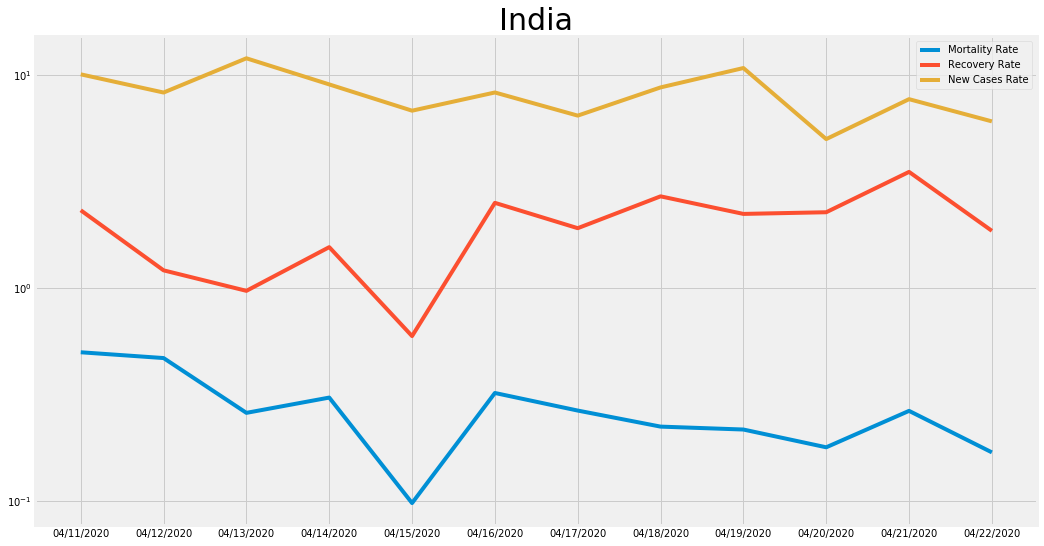

In [41]:
dates = confirmed.keys()
j=0
india_mortality_rate=[]
india_recovery_rate=[]
india_cases_rate=[]
for i in dates: 
    if int(india_daily_recoveries[j])==0 or int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())==0:
        india_recovery_rate.append(0)
        
    else:
        india_recovery_rate.append(int(india_daily_recoveries[j])/int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum()))
    
    if int(india_daily_deaths[j])==0 or int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())==0:
        india_mortality_rate.append(0)
    else:
        india_mortality_rate.append(int(india_daily_deaths[j])/int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum()))
   
    
    if int(india_daily_increase[j])==0 or int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())==0 :
        india_cases_rate.append(0)
    else:
        india_cases_rate.append(int(india_daily_increase[j])/int(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum()))
    j=j+1

for i in range(len(india_mortality_rate)):
    india_mortality_rate[i]=float(round(india_mortality_rate[i]*100,4))
    india_recovery_rate[i]=float(round(india_recovery_rate[i]*100,4))
    india_cases_rate[i]=float(round(india_cases_rate[i]*100,4))
    
    
after_days=80
plt.figure(figsize=(16, 9))
plt.plot(future_forcast_dates[after_days:],india_mortality_rate[after_days:])
plt.plot(future_forcast_dates[after_days:],india_recovery_rate[after_days:])
plt.plot(future_forcast_dates[after_days:],india_cases_rate[after_days:])
plt.yscale('log')

plt.title('India', size=30)
#plt.ylim(0,100)
plt.legend(['Mortality Rate', 'Recovery Rate','New Cases Rate'], prop={'size': 10})

In [62]:
#len(future_forcast_dates)
#len(india_daily_increase)
last_days=10
a="No of Cases of "+str(last_days)+" Days"
a

'No of Cases of 10 Days'

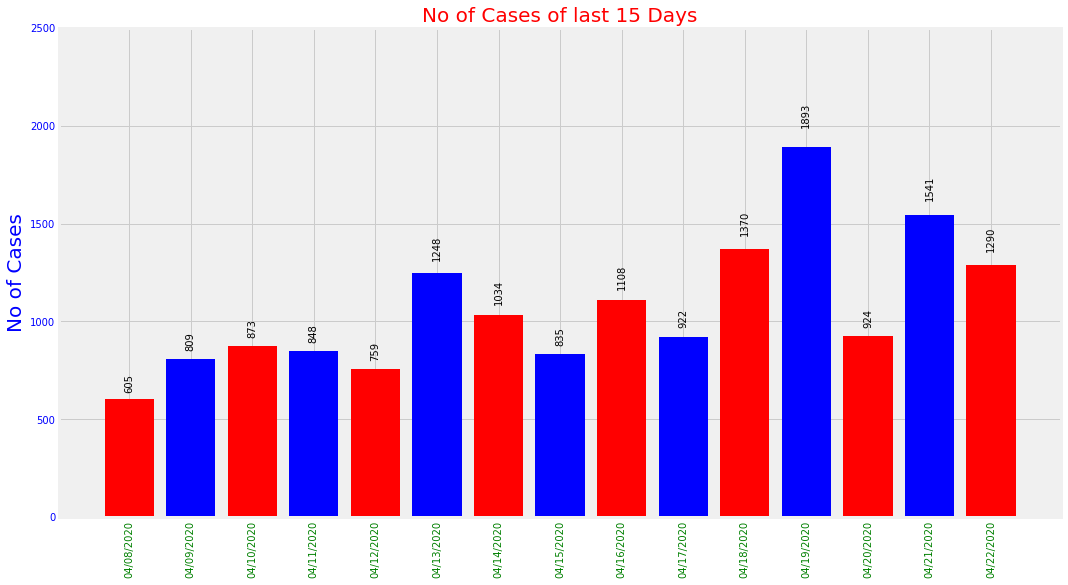

In [69]:

last_days=15
after_days=len(future_forcast_dates)-last_days
fig,ax = plt.subplots(figsize=(16, 9))
rects1 = ax.bar(future_forcast_dates[after_days:], india_daily_increase[after_days:],color=['red','blue'])
plt.title("No of Cases of last "+str(last_days)+" Days", size=20,color="red")
plt.xticks([r for r in range(len(future_forcast_dates[after_days:]))], future_forcast_dates[after_days:], rotation=90)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom',rotation=90)
autolabel(rects1)
plt.ylim(0,2500)
plt.ylabel('No of Cases', size=20,color="blue")
plt.xticks(size=10,color="green")
plt.yticks(size=10,color="blue")
plt.show()